## Developing the "USA-model" for probability of taking a drug
Let  $b = {year, age, ...}$ be a setting of covariates that we will use to model probability of taking a  drug $d$. We obtain:

- $n_{b,d}$: the number of people who are observed in that bin. That is, the number of people who could have been observed taking drug $d$, and
- $y_{b,d}$: the number of those people who were prescribed a drug.

We model this as a binomial distribution with a logistic regression. Then, for a given bin $b$ we have the estimate of probability of a person observed in bin $b$ getting prescription for drug $d$: $\hat{p}_{d,b}$.

## Deviance of county or state from USA-model 
How does the county or state data deviate from the USA model (residual)?  We have the counts per county or state: $y_{b,d,c}$, $n_{b,d,c}$. I used the **deviance residual**, which is the log likelihood ratio of the data under the USA-model versus the data under a fully-saturated model for that county. Since the data is binary (people either are or are not prescribed the drug in the unit of observed time), the likelihood compares two binomials.  Then, across all $b$, the log likelihood ratio of observed prescription in the county $c$ versus prescription under the USA model is:
$$ -2( L(USA) - L(sat) )=  2 [ \sum_b y_{d,c,b} \cdot log( { y_{d,c,b} \over { n_{d,c,b} \cdot \hat{p}_{d,b}  } }) +   \sum_b (n_{d,c,b} - y_{d,c,b}) \cdot log( { n_{d,c,b} - y_{d,c,b} \over { n_{d,c,b} \cdot (1 - \hat{p}_{d,b} )} })]$$ 

Derived from this, the deviance residual at a value of covariates (here, $(d,c) = i$) has been suggested, (with $\hat{y}_i  = n_i \cdot \hat{p}_i$ ):
$$G_i = sign(y_i - \hat{y}_i  ) \cdot [ y_i \cdot log( { y_i \over { \hat{y}_i } }) + (n_i - y_i) \cdot log( { n_i - y_i \over { n_i - \hat{y}_i} })]^.5$$ 

Since I am interested in how the county departs from the USA model overall, rather than just at one value of covariates, I take:
$$y_{d,c} = \sum_b y_{d,c,b} $$
$$n_{d,c} = \sum_b n_{d,c,b} $$
$$\hat{y}_{d,c} = \sum_b \hat{y}_{d,c,b} $$

Since different counties have different distributions of people falling into each bin $b$, I actually weighted the sums, using the distribution of the bins nationwide (the data used to create the USA-model), so all counties should be standardized the same way:
$w_{b,d} ={ n_{b,d} \over \sum_b n_{b,d} } $
Then we get the standardized counts: $n_{d,c} = \sum_b w_{b,d} \cdot n_{d,c,b}$; $ y_{d,c} = \sum_b w_{b,d} \cdot y_{d,c,b} $; $ \hat{y}_{d,c} = \sum_b w_{b,d} \cdot \hat{y}_{d,c,b} $.  Using these, I calculate $G_{d,c}$, rather than the log likelihood ratio.

Finally, we get a residual for each drug and each county.  Counties with a bigger population will have more bins $b$ observed, and the residuals have higher expected variance under the "null hypothesis" that distribution of drug taking in the county follows the USA-model. Below (Fig. 1) I plot the variance of $G_{d,c}$ per county.  So each point represents the variance of the residual across drugs in one county.

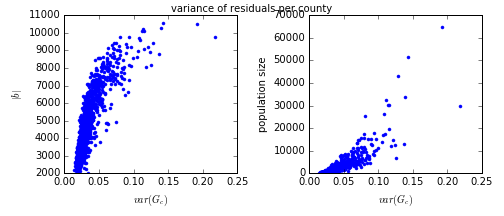

In [2]:
# FIG 1
Image(filename='png/residual_variances.png',width=500)

In order to be able to compare the counties to each other, I normalized the residual values for drugs in each county by the variance in that county, to make a z-score of the residuals. 

Below I plotted the first 3 principal components of the $G_{d,c}$ matrix. Each point is a county, colored by which state that county is in. The legend of state colors is in the USA map shown below that.

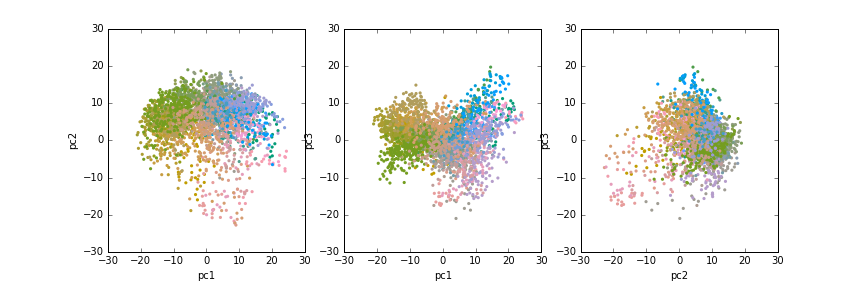

In [4]:
# FIG 2
Image(filename='png/counties3k.png',width=900)

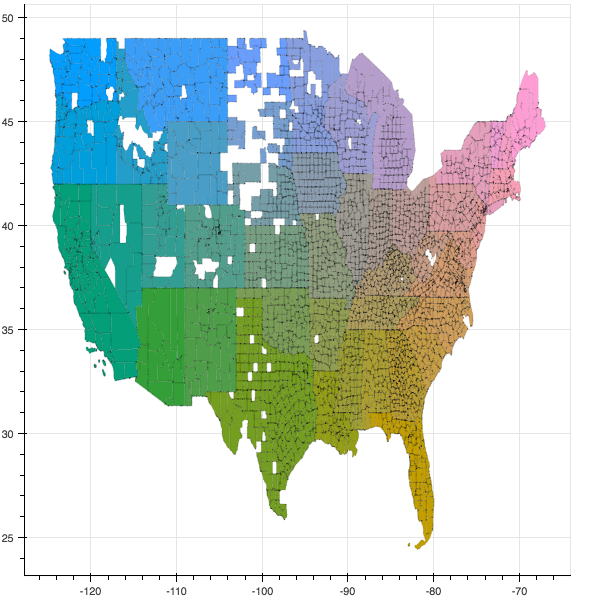

In [5]:
Image(filename='png/usalegend.png',width=300)

Observations from PCA plot (Fig. 2):
- Counties of same state are very closely related
- There's also a higher-level grouping of regions of the county: we saw that PC1 seems to be roughly North-South, and PC2 separates out the Northeast more or less.

### Analyzing deviance at state level
Analyzing distances between counties will need to happen, but since counties in the same state are so correlated with each other, this will dominate the results. Below, I show the correlation between vectors of drug-residuals (columns in the $G_{d,c}$ matrix) for each pair of states $g_{s,s'} = corr(G_{s}, G_{s'})$

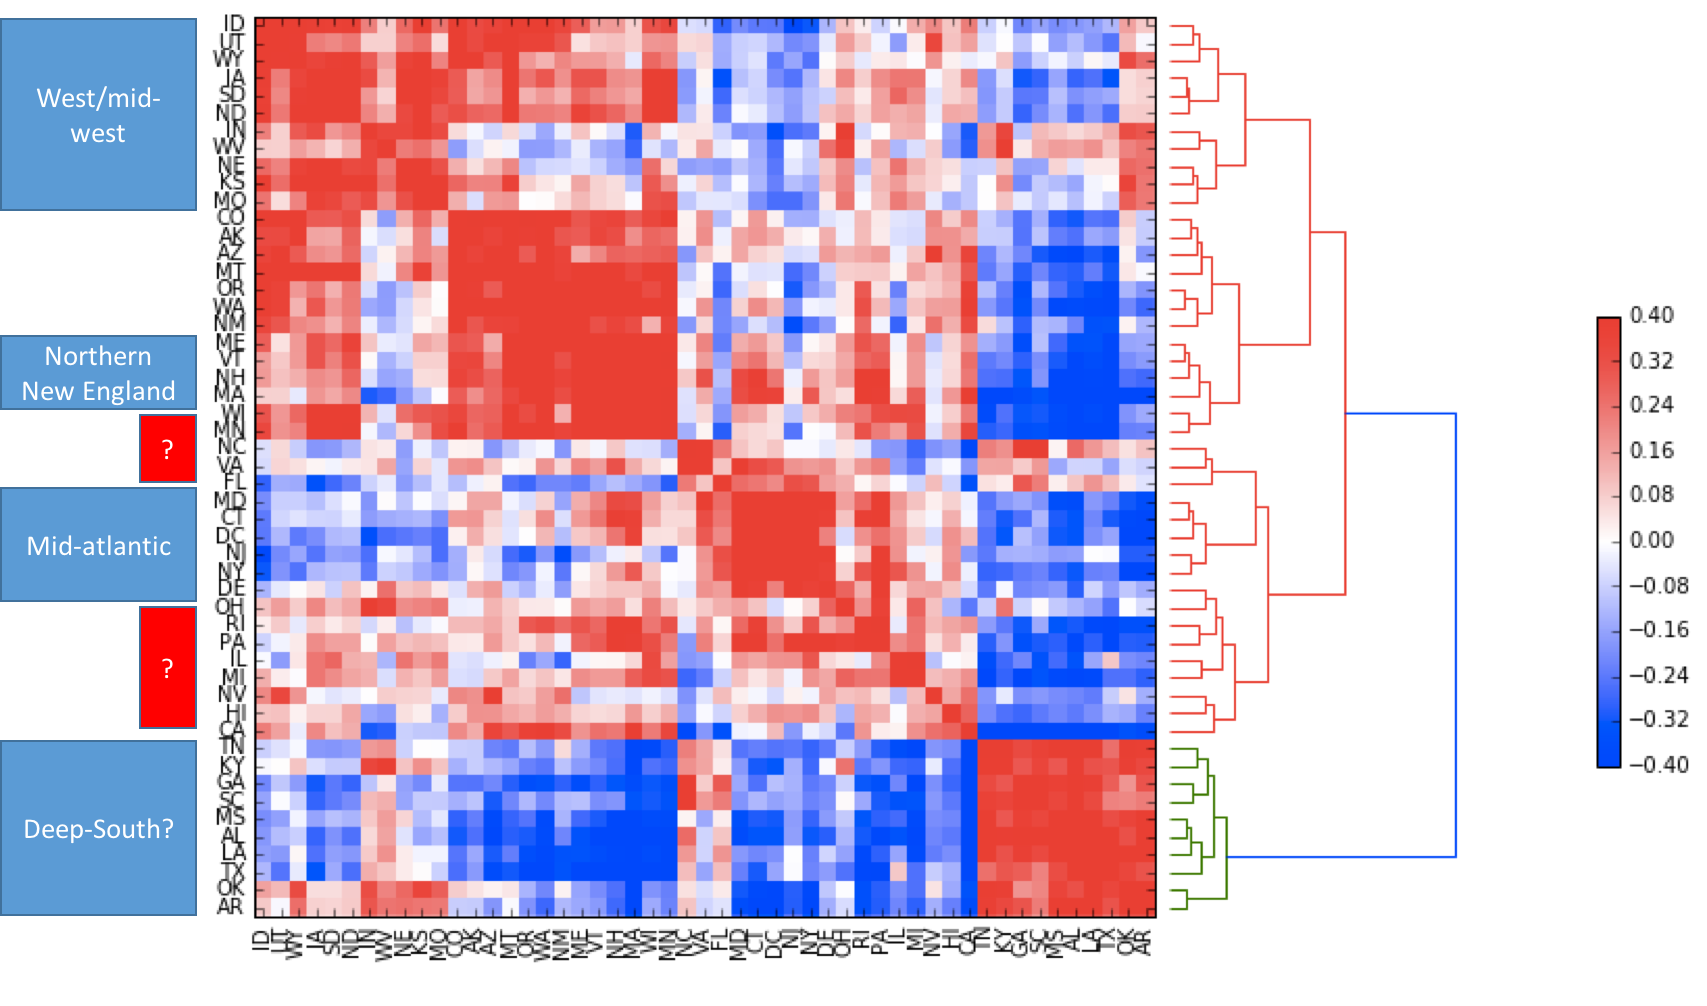

In [11]:
# FIG 3
Image(filename='png/state_dev_annot.png',width=900)

The hierarchical clustering definitely forms reasonable groupings as you would imagine from the PCA. But it also cearly misses some interesting non-hierarchical patterns.  Like, Oklahoma & Arkansas (bottom 2 rows) definitely are most correlated with the deep-south states, but also have a correlation with the northern-south/midwest (the red splotch in the bottom left).  

## Drug variation across states
Switching to a drug-centric view, I looked at drugs of the same class, and if their residuals correlate. That is, if one antidepressant is more likely to be prescribed in a county or state than the model predicts, are others also more likely?  Below, is the distribution of correlations of all pairs of antidepressants vs all pairs of drugs, showing clearly that drugs in the class have a higher correlation of residuals.

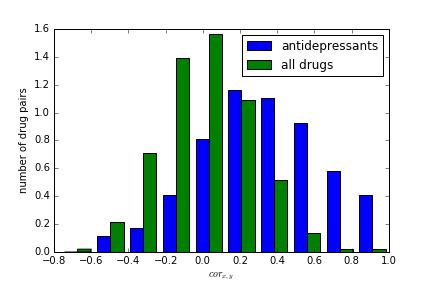

In [6]:
# FIG 4
Image(filename='png/drugcor.png',width=500)

The median correlation for antidepressants is around .3.  I plotted the medians for each pair of drug-classes (for the most frequent drug classes), to see how drug-classes co-vary across states.  Red on the diagonal indicates drugs from the same class co-vary.  Again some interesting things, like estrogens co-vary with antidepressants.  Cause & effect? Population stratifications?

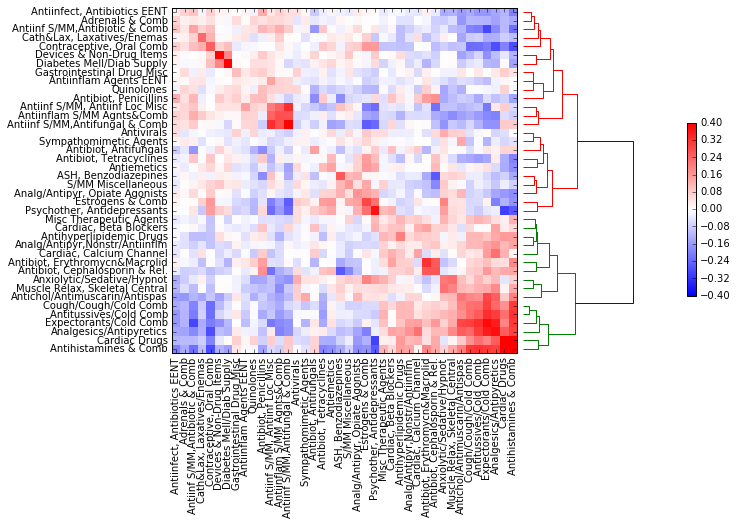

In [9]:
Image(filename='png/state_drug_cor.png',width=700)

Because drugs are in more than one class (ie, the coaugh & cold categories) I made the same plot but excluding drugs shared between the class (so now the diagonal is meaningless)

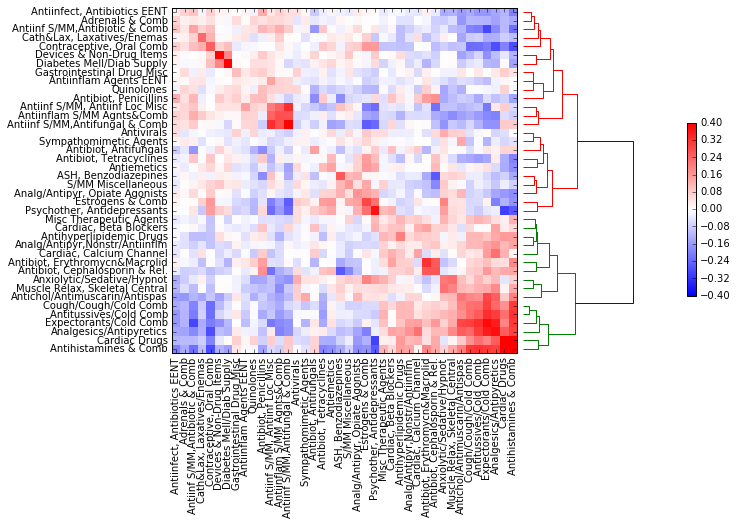

In [10]:
Image(filename='png/state_drug_cor_excludeshared.png',width=700)

Zooming in on a couple of these patterns, I compare a drug in the "cardiac drug" category against an antidepressant and against an antihistamine.  Here each point is a county (most populous counties).  Pretty clear that the northern counties have more antidepresant, less cardiac, less antihistamine.

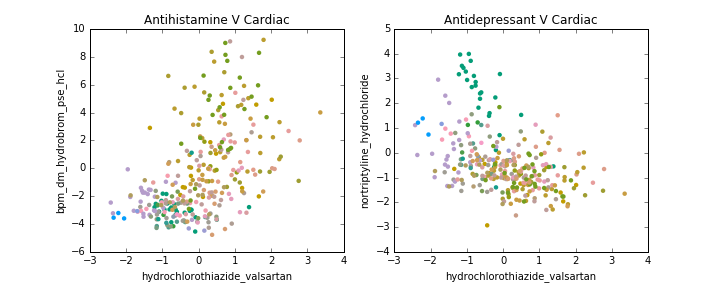

In [23]:
# FIG 7
Image(filename='png/cardiac_correlations.png',width=800)

In [2]:
from IPython.display import Image